In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [9]:
plt.rcParams['figure.figsize'] = (10, 8)

In [3]:
housing = pd.read_csv('./data/housing.csv')
housing.sample(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
10266    -117.84     33.89                24.0       3935.0           625.0   
18158    -122.04     37.37                23.0       5135.0           911.0   
15205    -117.07     33.01                 5.0       5870.0           977.0   
913      -122.01     37.53                27.0       1890.0           303.0   
4292     -118.29     34.09                34.0       2716.0          1114.0   
4598     -118.28     34.05                44.0        968.0           384.0   
619      -122.17     37.73                46.0       2163.0           470.0   
2304     -119.76     36.83                20.0       3214.0           446.0   
14460    -117.27     32.85                34.0       2105.0           444.0   
15814    -122.42     37.76                52.0       4001.0          1084.0   

       population  households  median_income  median_house_value  \
10266      1912.0       593.0         5.7951            226900.0   
18158      2351.0       863.0         5.2319            430100.0   
15205      1917.0       842.0         5.1998            294100.0   
913         889.0       314.0         5.7057            287600.0   
4292       2991.0      1021.0         1.7514            187500.0   
4598       1805.0       375.0         1.4801            212500.0   
619         925.0       435.0         3.2500            177500.0   
2304       1360.0       463.0         5.2595            110900.0   
14460       780.0       406.0         2.3187            488900.0   
15814      2129.0      1037.0         3.5052            391200.0   

      ocean_proximity  
10266       <1H OCEAN  
18158       <1H OCEAN  
15205       <1H OCEAN  
913          NEAR BAY  
4292        <1H OCEAN  
4598        <1H OCEAN  
619          NEAR BAY  
2304           INLAND  
14460      NEAR OCEAN  
15814        NEAR BAY

### Vokabel

* Spalten(`longitude`, `latitude`, ...) -> *Features*
* Zeilen -> *Observations*
* Tabelle -> *DataFrame*

### Explorative Data Analysis

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


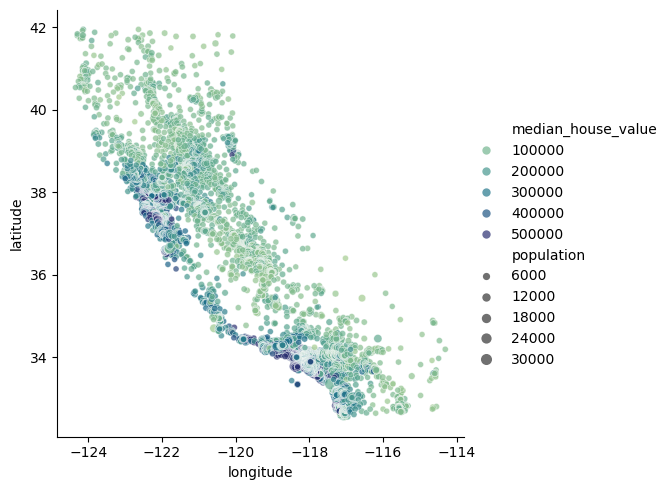

In [10]:
sns.relplot(data=housing,
            x='longitude',
            y='latitude',
            size='population',
            alpha=0.7,
            hue='median_house_value',
            palette='crest')

<Axes: xlabel='median_house_value', ylabel='Count'>

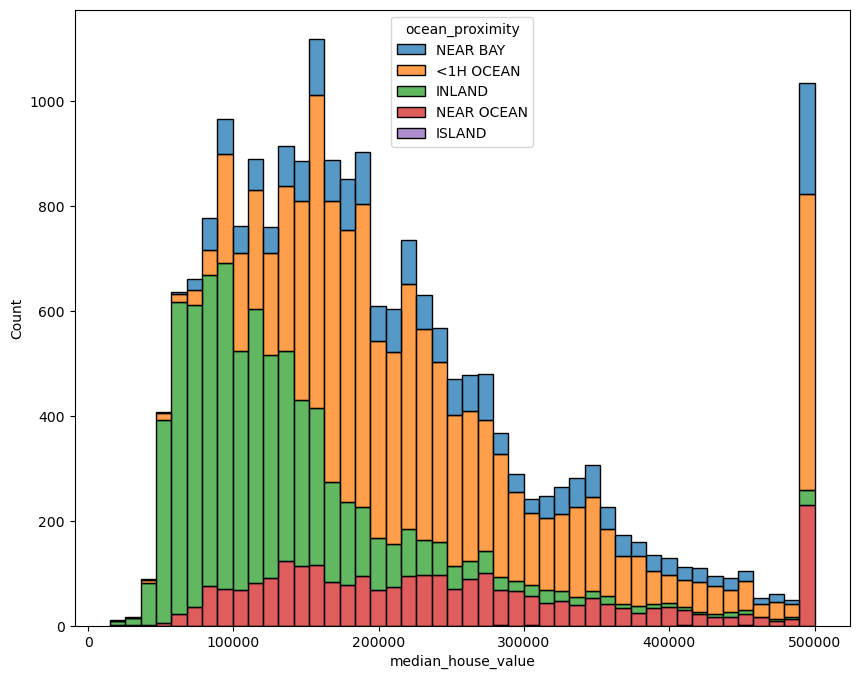

In [11]:
sns.histplot(data=housing, x='median_house_value', hue='ocean_proximity', multiple='stack')

<Axes: xlabel='median_income', ylabel='Count'>

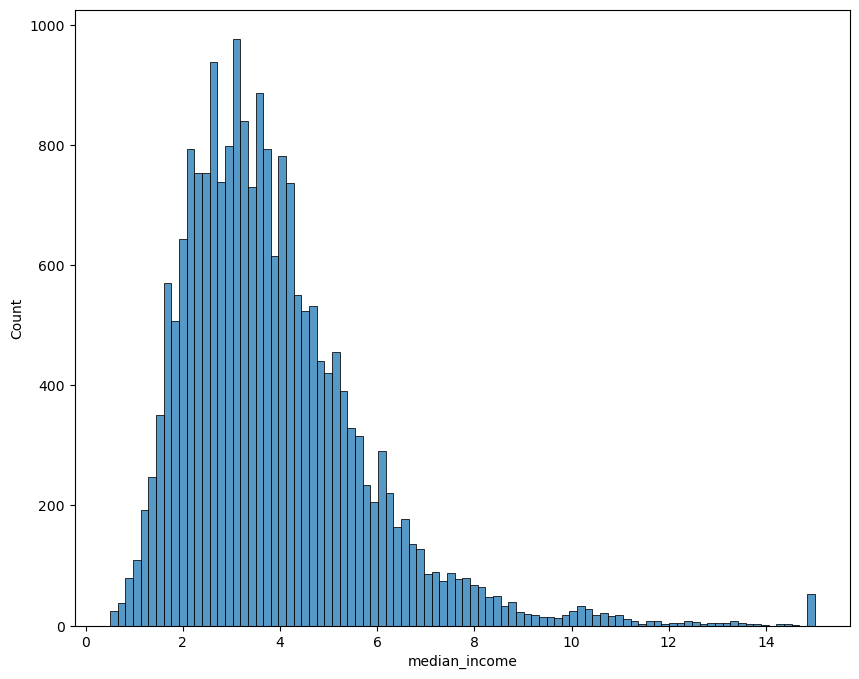

In [12]:
sns.histplot(housing['median_income'])

### Korrelation

Der Korrelationskoeffizient **r** gibt die Stärke des **linearen** Zusammenhangs zwischen 2 features an

![Korrelation](https://upload.wikimedia.org/wikipedia/commons/0/02/Correlation_examples.png)

<Axes: >

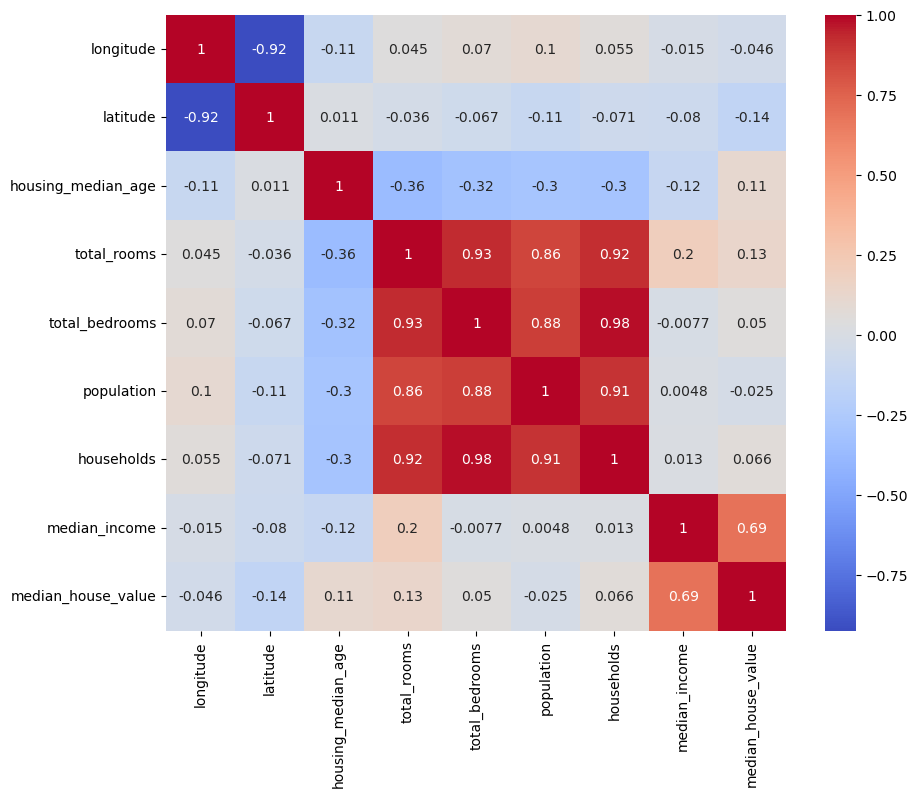

In [13]:
corr = housing.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')

### Training

1. model erzeugen
2. model an Trainingsdaten fitten
3. model evaluieren

y = model(X)

In [14]:
X = housing[['median_income']]
y = housing.median_house_value

<Axes: xlabel='median_income', ylabel='median_house_value'>

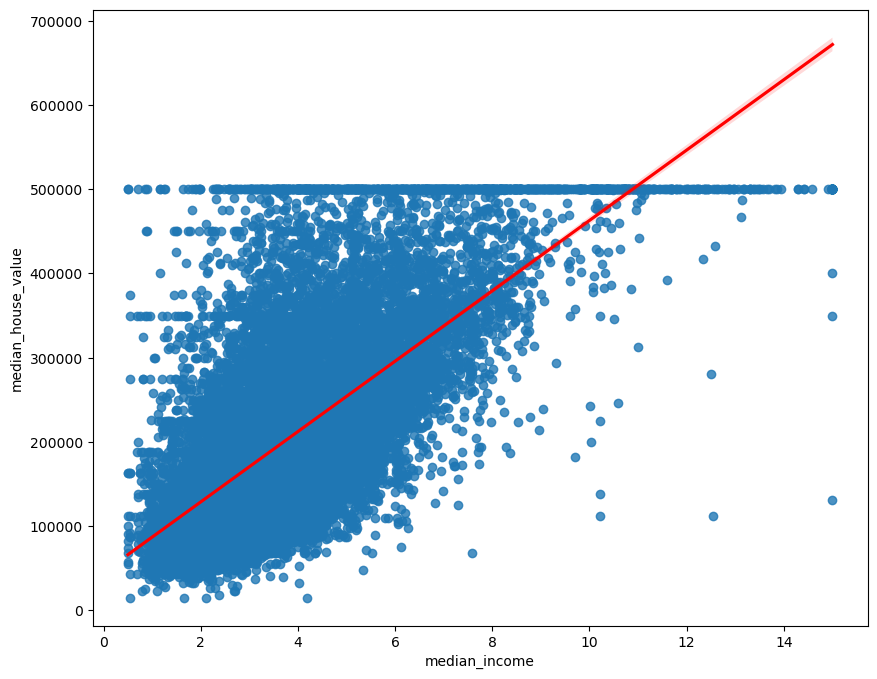

In [15]:
sns.regplot(x=X, y=y, line_kws = {'color': 'red'})

### Linear Regression

Finden einer Gerade, welche den Fehler minimiert
![Fehler](./assets/mse.png)
[gif](http://cdn-images-1.medium.com/max/640/1*eeIvlwkMNG1wSmj3FR6M2g.gif)

In [20]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [21]:
model.intercept_

45085.57670326796

In [23]:
model.coef_

array([41793.8492019])

In [26]:
model.predict([[-1], [2],[4]])

/opt/homebrew/Caskroom/miniconda/base/envs/dsai/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([  3291.72750137, 128673.27510706, 212260.97351085])

### Evaluierung?

Unmöglich, keine Daten -> train_test_split